
# Project: Investigate a Dataset - tmdb-movies 



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset (imdb movie) contains over 10000 movies covering about 60 years.


> For each of the over 10000 movies are the underlisted headers with corresponding description:


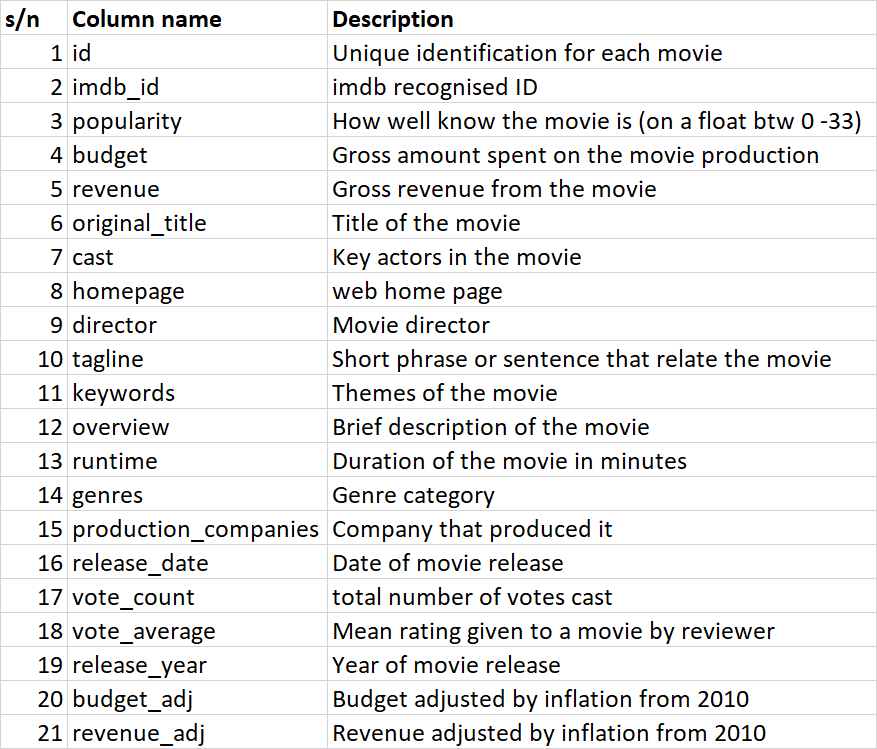



### Question(s) for Analysis
>**1**: Which of the movies characteristics are most relevant to the adjusted revenue?

>**2**: Does Vote count impact revenue? 

>**3** What movie genres have the most revenue
 

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling




In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


A quick glance at the first 5 row reveals 


Important infos such as 

the  movie unique identification, revenue, budget, vote, adjusted rveenue and budget, etc.


Double IDs (id and imdb_id), web home page and few others probably have insignificant relevance to the analysis hence, the need for elimination.

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
#to find which of the two id columns is truly a unique identifier

sum(df['imdb_id'].duplicated()), df['id'].duplicated().sum()

(10, 1)

In [6]:
df.duplicated().sum()

1

Comparing to the whole dateframe duplicate, it holds therefore that the 'id' is better retained

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Let's now drop columns that are less relevant to the analysis questions posed

In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
df.drop(['imdb_id','original_title','release_date','homepage','tagline', 'keywords', 'overview','production_companies'], axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


From the above function we were able to get the summary statistics with the following findings:

Majority of the movie had a run time of being 99mins to 111mins.

Highest vote average is 9.2 with average vote count at 10

Other info such as budget and revenue are not properly displayed hence the need for cleaning

In [10]:
df.isna().sum()

id               0
popularity       0
budget           0
revenue          0
cast            76
director        44
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [11]:
df.isnull().sum()

id               0
popularity       0
budget           0
revenue          0
cast            76
director        44
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64


### Data Cleaning

In [12]:
# we try to remove the null here
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10731 non-null  int64  
 1   popularity    10731 non-null  float64
 2   budget        10731 non-null  int64  
 3   revenue       10731 non-null  int64  
 4   cast          10731 non-null  object 
 5   director      10731 non-null  object 
 6   runtime       10731 non-null  int64  
 7   genres        10731 non-null  object 
 8   vote_count    10731 non-null  int64  
 9   vote_average  10731 non-null  float64
 10  release_year  10731 non-null  int64  
 11  budget_adj    10731 non-null  float64
 12  revenue_adj   10731 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


In [13]:
#To convert adjusted budget and revenue to integer

df['revenue_adj'] = df['revenue_adj'].astype(int)
df['budget_adj'] = df['budget_adj'].astype(int)

In [14]:
#check to ensure it's changed
type(df['revenue_adj'][3])

numpy.int32

In [31]:
df.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939,348161292
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955,271619025
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919,1902723129
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,174799923,1385748801


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which of the movies characteristics are most relevant to the adjusted revenue?

C:\Users\HP\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:69: RuntimeWarning: overflow encountered in long_scalars
  rdelta_ext = (rmax_ - rmin_) * range_padding / 2


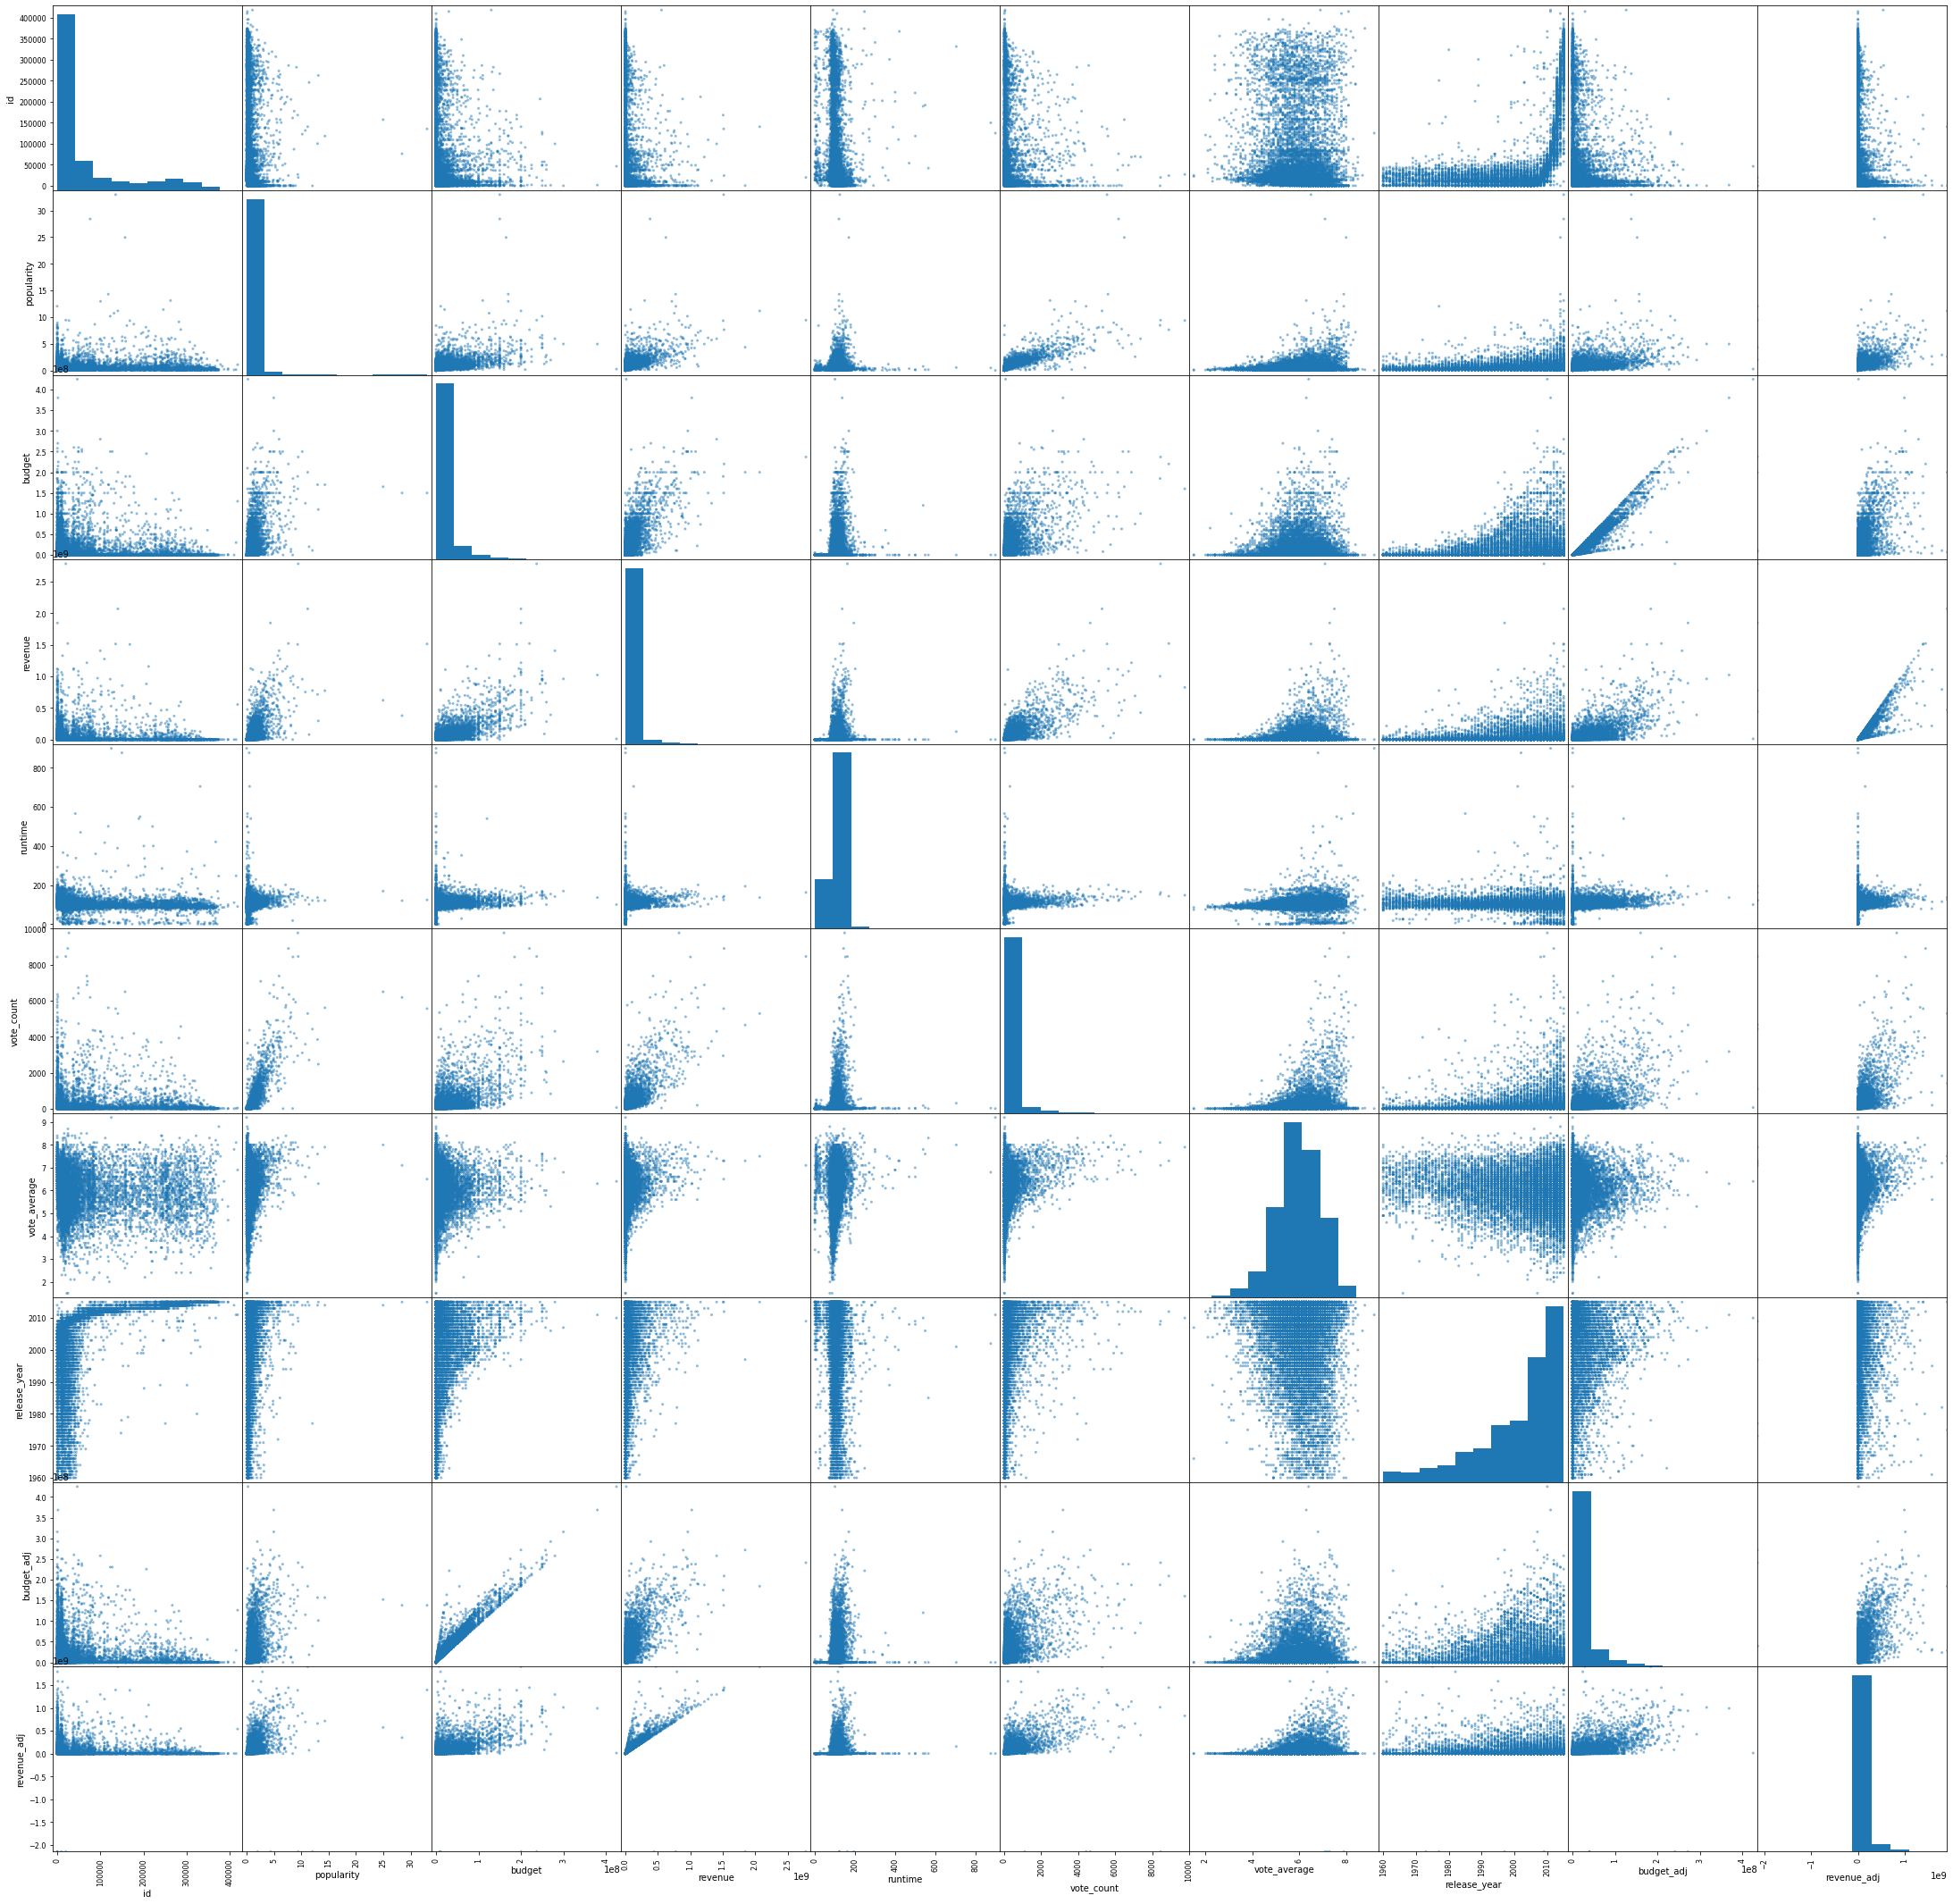

In [16]:
pd.plotting.scatter_matrix(df, alpha=0.5, ax=None, figsize=(38,38));
                       

From the above scatter matrix, vote count, budget, popularity reflect partern of positive relationship to the revenue

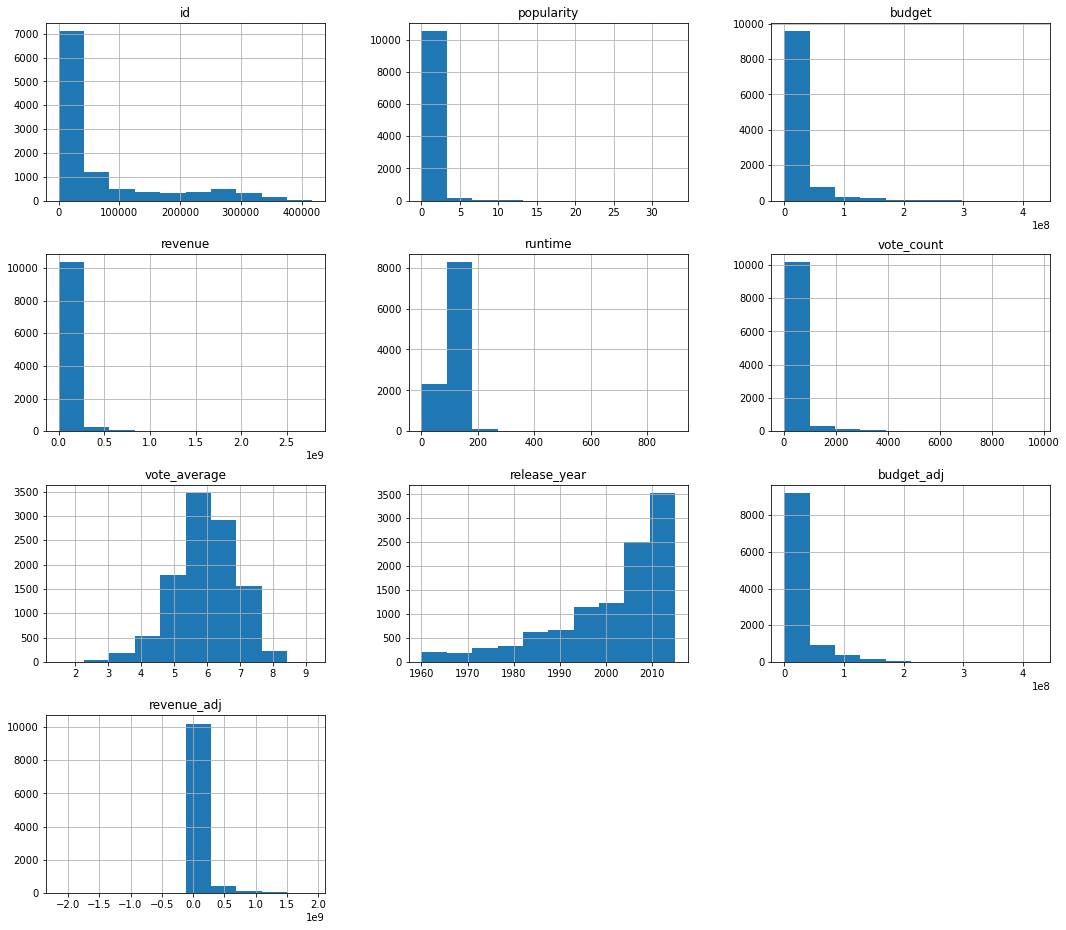

In [17]:
df.hist(figsize=(18,16));

Vote average seems to be normally distributed

### Research Question 2&3: Does Vote count impact revenue? What movie genres have the most revenue?

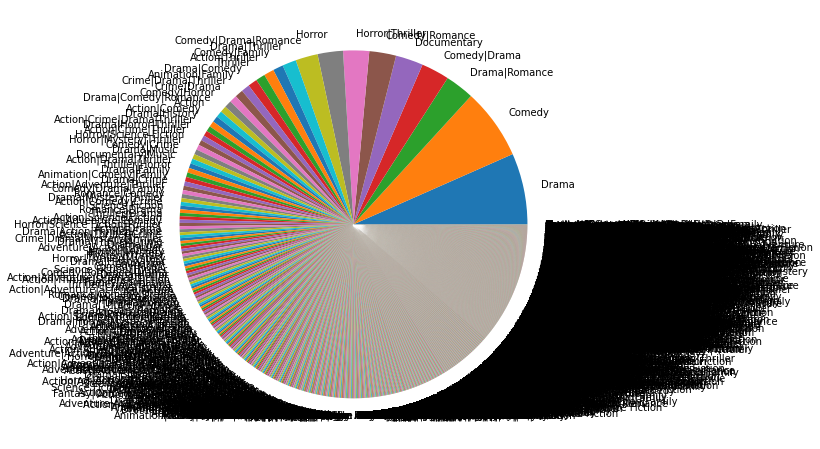

In [19]:
#To get a glance at the relative proportion of the genres
df['genres'].value_counts().plot(kind='pie', figsize= (8,8));

Although this looks cramped up, but we could clearly visualise that the top three genre are:

Drama

Comedy

Drama|Romance.

Let's now examinine based on revenue the optimum movie genre to be produce by a production company

In [20]:
df_drama = df[df['genres']=='Drama']
df_comedy = df[df['genres']=='Comedy']
df_Romance = df[df['genres']=='Drama|Romance']
df_drama.head()
df_comedy

,id,popularity,budget,revenue,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
26,214756,4.564549,68000000,215863606,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,115,Comedy,1666,6.3,2015,62559972,198594430
51,257211,2.814802,35000000,194564672,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,Nancy Meyers,121,Comedy,1255,7.1,2015,32199985,178999419
69,271718,2.317670,35000000,140795793,Amy Schumer|Bill Hader|Brie Larson|Colin Quinn...,Judd Apatow,125,Comedy,849,6.1,2015,32199985,129532072
78,296100,2.096273,25000000,52395996,Joseph Gordon-Levitt|Seth Rogen|Anthony Mackie...,Jonathan Levine,100,Comedy,363,6.1,2015,22999989,48204295
91,274167,1.904898,50000000,240360392,Will Ferrell|Mark Wahlberg|Linda Cardellini|Th...,Sean Anders,96,Comedy,568,5.7,2015,45999979,221131463
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10753,19307,0.021121,0,0,Sid James|Charles Hawtrey|Joan Sims|Kenneth Wi...,Gerald Thomas,88,Comedy,11,6.4,1969,0,0
10760,8469,1.157930,2700000,141000000,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,109,Comedy,230,6.7,1978,9025291,471320797
10764,11455,0.608679,0,41590893,Cheech Marin|Tommy Chong|Strother Martin|Edie ...,Lou Adler,86,Comedy,103,6.5,1978,0,139025906
10816,16378,0.064602,0,0,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76,Comedy,14,6.0,1978,0,0


In [21]:
df_drama = df.query('genres == "Drama"')['revenue_adj'].mean()
df_comedy = df[df['genres']=='Comedy']['revenue_adj'].mean()
df_Romance = df[df['genres']=='Drama|Romance']['revenue_adj'].mean()
df_mean = df['revenue_adj'].mean()
#[29440238.432394367,
# 35151277.902404524,
 #31846373.107266437,
 #52006229.220482714]
xaxis=['Drama', 'Comedy', 'Romance', 'All']
adj_rev = [df_drama, df_comedy, df_Romance, df_mean]
adj_rev

[29440238.432394367,
 35151277.902404524,
 31846373.107266437,
 50246793.825831704]

Text(0.5, 1.0, 'average revenues for Drama, Comedy, Romance and All')

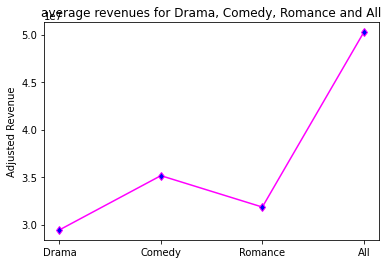

In [22]:
plt.plot(xaxis,adj_rev, color='magenta', marker='d',mfc='b');
plt.ylabel('Adjusted Revenue') 
#plt.xlabel(xaxis) 
plt.title("average revenues for Drama, Comedy, Romance and All") 

In [23]:
median = df['vote_count'].median()
low = df.query('vote_count < {}'.format(median))
high = df.query('vote_count >= {}'.format(median))

rev_low_vote = low['revenue_adj'].mean()
rev_high_vote = high['revenue_adj'].mean()
lis = [rev_low_vote, rev_high_vote]
lis

[4109195.1820392893, 96033177.92369105]

C:\Users\HP\AppData\Local\Temp/ipykernel_8648/1760935364.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g^" (-> marker='^'). The keyword argument will take precedence.
  plt.plot(['Low_Vote', 'High_Vote'], lis, 'g^', marker='D',


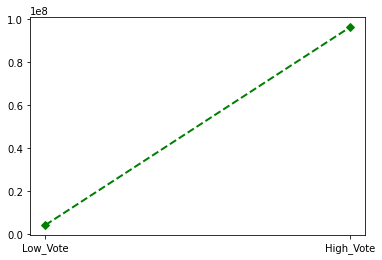

In [25]:
plt.plot(['Low_Vote', 'High_Vote'], lis, 'g^', marker='D', 
         linestyle='dashed', linewidth=2);

In [28]:
def scatter_plotter(xaxis,yaxis,titl):
    df.plot(kind='scatter', x=xaxis,y=yaxis, title=titl);

With matplotlib line graph, we could clearly see the disparity in the mean revenue of low and high vote

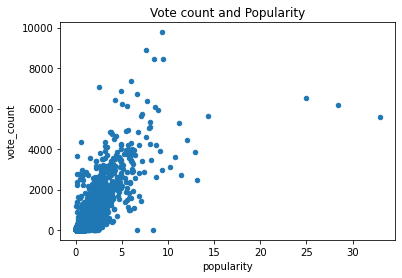

In [29]:
#a glance at the relation between vote count and movie popularity shows positive correlation
#df.plot(kind='scatter', x='popularity',y='vote_count', title="Vote count and Popularity");
scatter_plotter('popularity','vote_count',"Vote count and Popularity");

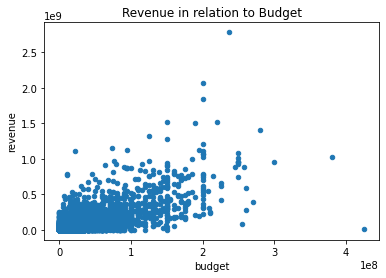

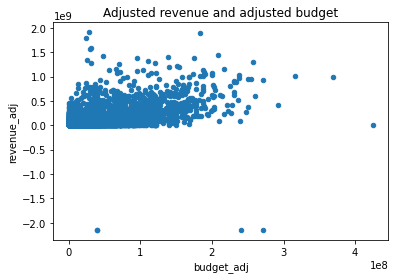

In [30]:
#df.plot(kind='scatter', x='budget',y='revenue', title="Revenue in relation to Budget");
#df.plot(kind='scatter', x='budget_adj',y='revenue_adj', title="Adjusted revenue and adjusted budget");
scatter_plotter('budget','revenue',"Revenue in relation to Budget");
scatter_plotter('budget_adj','revenue_adj',"Adjusted revenue and adjusted budget");
#It can be seen here that budget has clear level of influence on the revenue although not so straight

<a id='conclusions'></a>
## Conclusions

1: Which of the movies characteristics are most relevant to the adjusted revenue?

Movie characters attributes such as the vote count, average vote, budget, genres reflect significant level of impact on the revenue made.

2: Does Vote count impact revenue? 

Vote count showed a positive correlation with revenue from the plotted sctatter plot hence it does have an impact.

3 What movie genres have the most revenue

It was found that producers are best focused on genres such as "Drama", "Comedy" and "Romance" for increased revenue chance.

Popularity and revenue do no seem to show strong positive correlation. This poses the question of piracy as highly demanded (popular) movies does not translate to proportionate increase in revenue



## Limitations 

> Conclusion for the most viable genre was based on revenue without cost consideration.
> Data set was collated over a long period of time which might question its accuracy.
> There were instance of missing data which were later cleaned.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1